In [1]:
# General import
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.dataprocess import Export_ep
from Codes.dataprocess import Export_im
from Codes.algoviolet import violetBD
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.display import Display_epd
from Codes.myfunc import nablah
from Codes.myfunc import convolve
from Codes.simplex import Simplex

# Minimisation fonction bi-convexe concave

On introduit le probleme d'optimisation biconvex-concave
de déconvolution aveugle d'images 
avec l' a priori de noyau de convolution régulier,

$$
\underset{u \in U ,K \in \Sigma}{\text{min}} \; \underset{v}{\text{sup}} \;
\frac{1}{2} \gamma \| g - K * u\|^2 
+ \frac{1}{2} \alpha \| D K \|^2
+ \langle \nabla u , v \rangle
+ \chi_{B,\mu}(v)
\; .
$$

L'espace $\Sigma$ correspond à l'ensemble des simplexes 
(ensemble des noyaux à coefficient positif dont la somme des coefficients vaut 1).
Par extension on notera $\Sigma$ la fonction indicatrice de cet ensemble.
L'espace $U$ correspond à l'hypercube $[0,1]^{N_x \times N_y}$, ou la boule unité pour la norme $L^\infty$.
Sa fonction indicatrice correspond donc à $\chi_{B,1}$.

La fonction à minimiser peut alors se réécrire

$$
\underset{u ,K }{\text{min}} \; \underset{v}{\text{sup}} \;
\frac{1}{2}\gamma \| g - K * u\|^2 
+ \chi_{B,1} (u)
+ \frac{1}{2} \alpha \| D K \|^2
+ \Sigma(K)
+\langle \nabla u , v \rangle
+ \chi_{B,\mu}(v)
\; .
$$

On note

$$
L =\frac{1}{2} \gamma \| g - K * u\|^2 
+ \frac{1}{2} \alpha \| D K \|^2
+ \langle \nabla u , v \rangle
$$

Pour résoudre ce probleme d'optimisation on se propose de tester l'algorithme suivant,

$$
\left\{
\begin{align}
& K_{k+1} = \text{prox}_{\Sigma} \; (K_k - \gamma \partial_K L(\tilde{u}_{k+1},K_k,v_k) \; )\\
& v_{k+1}         = \text{prox}_{B_\mu} \; (v_k + \sigma \partial_v L (u_{k+1},K_{k+1},v_k) \; )\\
& \tilde{u}_{k+1} = \text{proj}_{B_1} \; (u_k - \tau \partial_u L(u_k,K_k,v_k) \; )\\
& u_{k+1} = \tilde{u}_{k+1} + \theta_u (\tilde{u}_{k+1} - u_k) \quad \text{(relaxation)}
\end{align}
\right.
$$

Question :
est-ce qu'on met une relaxation aussi sur $K$ ?

$$
K_{k+1} = \tilde{K}_{k+1} + \theta_K (\tilde{K}_{k+1} - K_k)  \quad \text{(relaxation aussi ?)}
$$

On écrit alors les dérivées partielles de $L$,

$$
\left\{
\begin{align}
& \partial_u L(u_k,K_k,v_k) \; ) = \text{div} \cdot v_k - \tilde{K} * (g-K*u)\\
& \partial_K L(\tilde{u}_{k+1},K_k,v_k) \; ) = - (g-K*u)*\tilde{u} + \alpha D^TDK \\
& \partial_v L (u_{k+1},K_{k+1},v_k) \; ) =  \nabla u
\end{align}
\right.
$$

On trace les énergies primales et duales au cours de la minimisation

$$
\left\{
\begin{align}
& Ep = \frac{1}{2} \| g - K * u\|^2 
+ \frac{1}{2} \alpha \| D K \|^2
+ \mu. \text{TV} (u) \\
\\
& Ed = - \langle \nabla u ,v \rangle - \chi_{B,\mu}(v)
\end{align}
\right.
$$

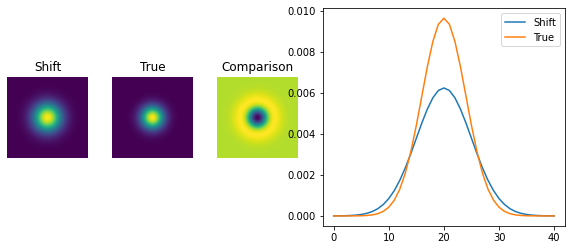

Erreur |Shift - True|/ |True| : 0.2811 


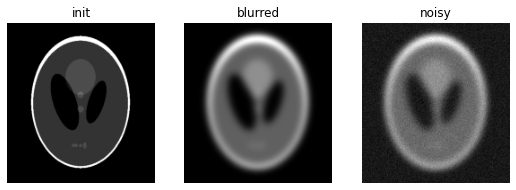

Erreur blurred |x_blurr- x_true|_2 :0.5683
Erreur |x_noisy - x_true|_2 :0.5731


In [2]:
K1, K2, x_im, x_b, x_o1 = DataGen()

In [40]:
# Export
import imageio
imageio.imwrite('u.jpg', x_im)
imageio.imwrite('g.jpg', x_b)
imageio.imwrite('gdelta.jpg', x_o1)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.684249447727645e-16, 0.5264424930393418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.0600882060975689, 0.5670901472315799]. Convert image to uint8 prior to saving to suppress this warning.


## Initialisation du noyau proche - pas de bruit

In [3]:
alpha = 500
mu    = 0.005
K_in   = K2.copy()
x_in  = x_b
K_ob,x_ob,Epb,Edb = violetBD(x_in,K_in,x_b,alpha,mu,\
                            niter=500,coeffK=1,coeffx=0.1,\
                            proj_simplex=True,verbose=False)
# (1/tau_u - Lf) = sqrt(8)
# tau_v = coeff_v1/sqrt(8)
# tau_k = coeff_K*2/L_total
# (1/tau_u - Lf)1/tau_v <8

Final energy : 2.484973978422979


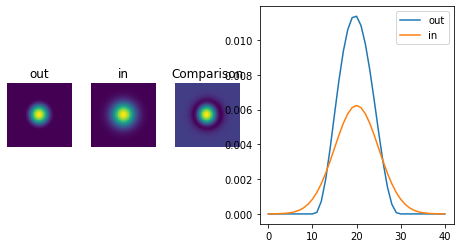

Erreur |out - in|/ |in| : 0.6262 


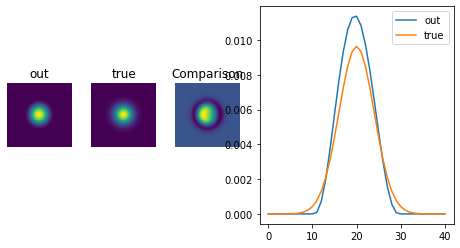

Erreur |out - true|/ |true| : 0.2329 


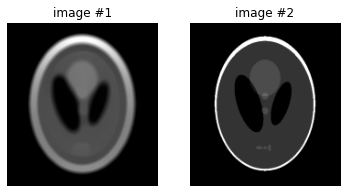

Erreur |im1 - im2|/|im2| :0.5143


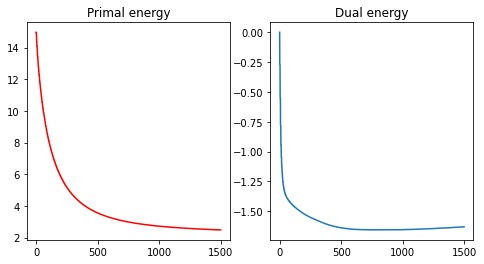

In [8]:
Display_ker(K_ob,K2,mysize=(8,4),label1='out',label2='in')
Display_ker(K_ob,K1,mysize=(8,4),label1='out',label2='true')
Display_im(x_ob,x_im,mysize=(6,3))
Display_epd(Epb,Edb)

In [44]:
imageio.imwrite('pda_b.jpg', x_ob)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


## Initialisation noyau proche - bruit std 0.05

In [14]:
alpha     = 500
mu        = 0.005
K_in      = K2.copy()
x_in      = x_o1#np.zeros(x_im.shape)
K_o2,x_o2,Ep2,Ed = violetBD(x_in,K_in,x_o1,\
                            alpha,mu,coeffK=1,coeffx=1,gamma=1,\
                            niter=1500,\
                            proj_simplex=True,verbose=False)

Final energy : 5.986112119488041


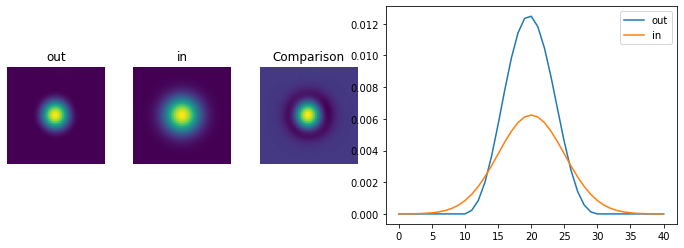

Erreur |out - in|/ |in| : 0.6907 


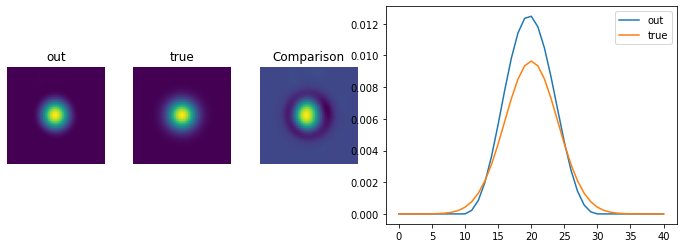

Erreur |out - true|/ |true| : 0.2791 


In [15]:
Display_ker(K_o2,K2,mysize=(12,4),label1='out',label2='in')
Display_ker(K_o2,K1,mysize=(12,4),label1='out',label2='true')

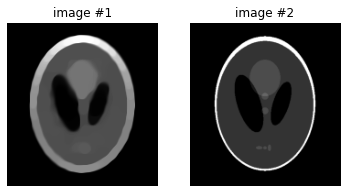

Erreur |im1 - im2|/|im2| :0.5349


In [16]:
Display_im(x_o2,x_im,mysize=(6,3))

In [43]:
imageio.imwrite('pda_o.jpg', x_o2)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


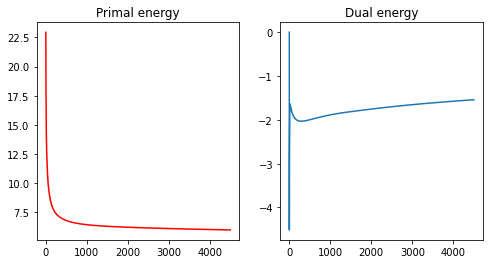

In [17]:
Display_epd(Ep2,Ed)

# Sans régularisation du noyau

In [ ]:
# alpha     = 0
# mu        = 0.005
# K_in      = K2.copy()
# x_in      = x_o1#np.zeros(x_im.shape)
# K_out2_0,x_out2_0,Ep20,Ed20 = violetBD(x_in,K_in,x_o1,\
#                             alpha,mu,coeffK=1,coeffx=0.1,gamma=1,\
#                             niter=1500,\
#                             proj_simplex=True,verbose=False)

In [ ]:
# plt.plot(Ep22)
# plt.plot(Ep20)